# Polynomial interpolation

In this notebook we try to replace functions with a (finite-dimensional) polynomial approximation. Several different polynomials basis are implemented.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

First of all we define our basis, and a convenient function to recover a particular basis:

In [84]:
def monomials(i):
    return lambda x: np.power(x,i)

def lagrange(j, interpolation_points):
    return lambda x: np.product(
            [(x - interpolation_points[i]) / (interpolation_points[j] - interpolation_points[i]) 
                 for i in np.delete(np.array(range(len(interpolation_points))), j)], 
            axis=0)

def generate_basis(label, interpolation_points):
    if label[0] == 'l':
        return [lagrange(i, interpolation_points) for i in range(len(interpolation_points))]
    elif label[0] == 'm':
        return [monomials(i) for i in range(len(interpolation_points))]

We plot the basis to show how they work:

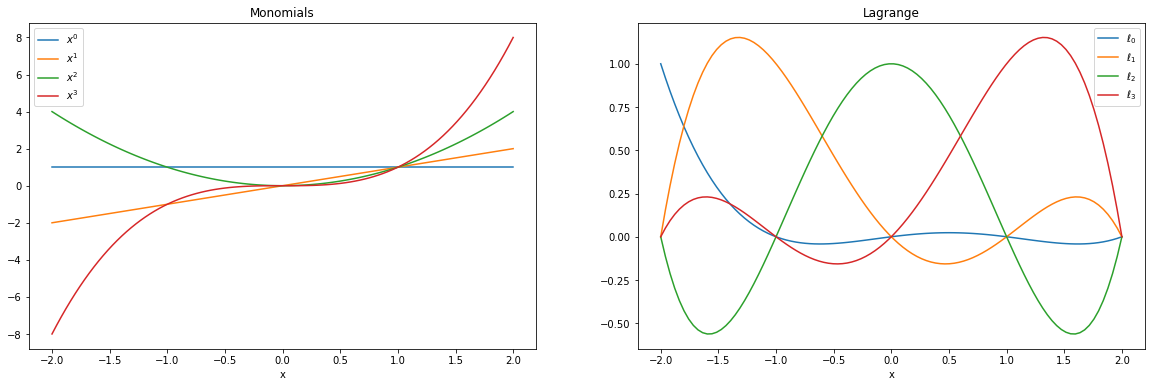

In [99]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
x = np.linspace(-2,2,100)
for i in range(4):
    plt.plot(x,monomials(i)(x), label='$x^{}$'.format(i))
plt.legend()
plt.title('Monomials')
plt.xlabel('x')

interp_points = np.linspace(-2,2,5)

plt.subplot(1,2,2)
x = np.linspace(-2,2,100)
for i in range(4):
    plt.plot(x,lagrange(i, interp_points)(x), label='$\\ell_{}$'.format(i))
plt.legend()
plt.title('Lagrange')
plt.xlabel('x')

plt.show()

Then, we create several functions to perform the actual interpolation:

In [114]:
def V_matrix(interpolation_points, basis):
    return np.array([f(interpolation_points) for f in basis]).T

# interpolation entry-point
# l -> 'lagrange'
def interpolate(f, interpolation_points, basis_label='l'):
    basis = generate_basis(basis_label, interpolation_points)
    
    V = V_matrix(interpolation_points, basis)
    p = np.linalg.solve(V, f(interpolation_points))
    
    return lambda x: np.inner(p, np.array([bf(x) for bf in basis]).T)

We now test our functions on $\sin$, using two different basis:

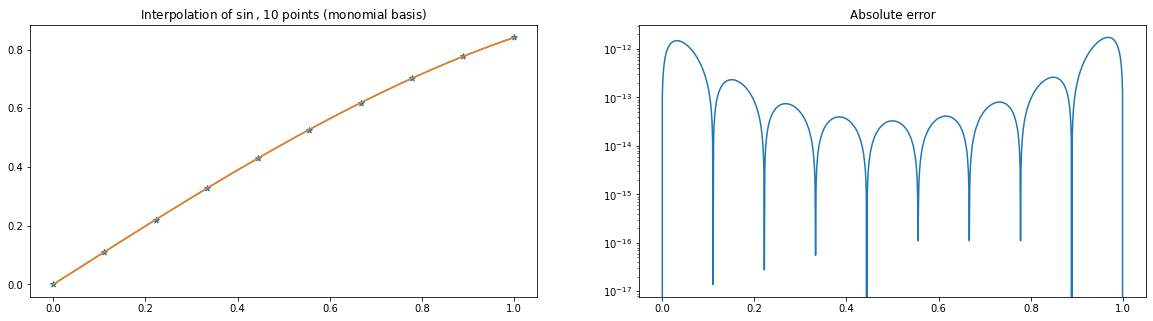

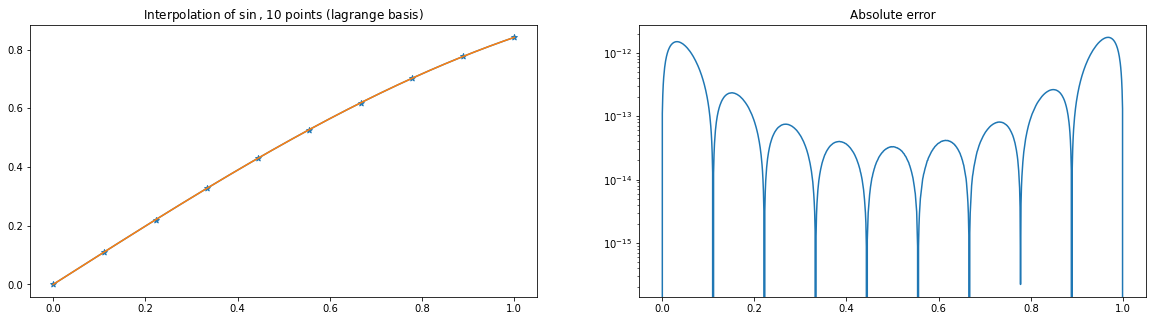

In [117]:
interp_points = np.linspace(0,1,10)
x = np.linspace(0,1,1000)

labels = ['monomial', 'lagrange']

for l in labels:
    fintp = interpolate(np.sin, interp_points, basis_label=l)

    plt.figure(figsize=(20,5))

    plt.subplot(1,2,1)
    plt.plot(x, np.sin(x))
    plt.plot(x, fintp(x))
    plt.scatter(interp_points, np.sin(interp_points), marker='*')
    plt.title('Interpolation of $\sin$, {} points ({} basis)'.format(len(interp_points), l))

    plt.subplot(1,2,2)
    plt.plot(x, np.abs(fintp(x) - np.sin(x)))
    plt.title('Absolute error'.format(len(interp_points)))
    plt.yscale('log')

    plt.show()

We now evaluate the behavior of $\Vert f - I^nf \Vert_\infty$ for varying $n$, where $I^n$ is the interpolation operator we defined in the functions above.

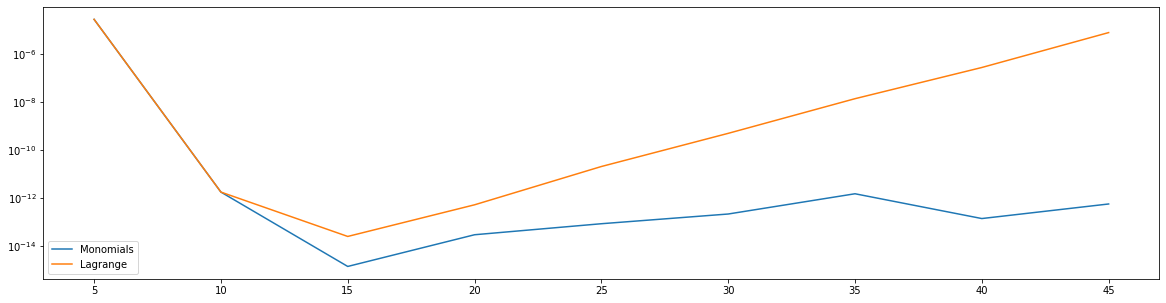

In [127]:
def linfty(f):
    return np.max(np.abs(f))

n = range(5,50,5)
x = np.linspace(0,1,1000)

plt.figure(figsize=(20,5))

plt.plot(n, 
    list(
        map(lambda interp_points: linfty(interpolate(np.sin, interp_points, basis_label='m')(x) - np.sin(x)), 
            map(lambda ni: np.linspace(0,1,ni), n))
    ),
    label='Monomials'
)
plt.plot(n, 
    list(
        map(lambda interp_points: linfty(interpolate(np.sin, interp_points, basis_label='l')(x) - np.sin(x)), 
            map(lambda ni: np.linspace(0,1,ni), n))
    ),
    label='Lagrange'
)
plt.yscale('log')
plt.legend()

plt.show()